# Assignment 3: Hopfield Networks


In [209]:
import numpy as np
import matplotlib.pyplot as plt

In [210]:
class HopfieldNetwork:
    def __init__(self):
        self.weights = None

    def train(self, patterns, check=False, asynchronous=False, max_iter=1):
        self.patterns = patterns

        # W = xT * x
        self.weights = np.sum([p.reshape((-1,1))*p.reshape((1,-1)) for p in patterns], axis=0).astype(np.float)

        # divide by number of units
        self.weights /= self.weights.shape[0]

        if check:
            patterns_to_learn = len(patterns)
            patterns_learnt = 0
            for pattern in patterns:
                output = self.recall(pattern, asynchronous, max_iter)
                if output.all() == pattern.all():
                    patterns_learnt += 1

            compare_array = output == pattern
            if compare_array.all():
                print("All", patterns_learnt, "patterns learnt." )
            else:
                print("Only", patterns_learnt, "patterns learnt." )

    
    def recall(self, pattern, asynchronous=False, max_iter=100, check_data=False, check_data_cycle=1):
        if not asynchronous:
            # print("Running Recall")
            output = np.sign(np.dot(pattern,self.weights))
            # takes care of zeros
            output[output == 0] = -1
            return output
        else:
            if not check_data:
                pattern_copy = pattern.copy()
                iter = 0
                while iter<max_iter:
                    # list of all the positions still left to update
                    self.positions_to_update = list(np.arange(0,pattern.shape[0],1))
                    # loop through W vectors on pattern appliying the change to the data
                    for i in range(0, pattern.shape[0]):
                        updated_pattern = self.asynchronous_update(pattern_copy)
                        pattern_copy = updated_pattern
                    
                    iter += 1
                return updated_pattern
            else:
                pattern_copy = pattern.copy()
                iter = 0
                while iter<max_iter:
                    # list of all the positions still left to update
                    self.positions_to_update = list(np.arange(0,pattern.shape[0],1))
                    # loop through W vectors on pattern appliying the change to the data
                    for i in range(0, check_data_cycle):
                        updated_pattern = self.asynchronous_update(pattern_copy)
                        pattern_copy = updated_pattern
                    
                    iter += 1
                return updated_pattern

                # else:
                #     iter = 0
                #     counter = 0
                #     pattern_copy = pattern.copy()

                #     # list of all the positions still left to update
                #     self.positions_to_update = list(np.arange(0,pattern.shape[0],1))
                #     # loop through W vectors on pattern appliying the change to the data
                #     for i in range(0, check_data_cycle):
                #         check_data_cycle = check_data_cycle - counter*pattern.shape[0]
                #         updated_pattern = self.asynchronous_update(pattern_copy)
                #         pattern_copy = updated_pattern

                #         if i%pattern.shape[0] == 0:
                #             counter += 1
                #             self.positions_to_update = list(np.arange(0,pattern.shape[0],1))

                #     return updated_pattern


    def asynchronous_update(self, pattern, seed=2020):
        np.random.seed(seed)
        j = np.random.choice(self.positions_to_update)

        output = np.sign(np.sum(self.weights[j,:]*pattern))

        updated_pattern = pattern
        updated_pattern[j] = 1 if output>0 else -1

        self.positions_to_update.remove(j)
        return updated_pattern 

    def check_attractors(self, display_attractors=True):
        attractors = set()
        possibilities = len(self.patterns[0])

        for num in range(0, 2**possibilities):
            # Decimal to binary number list conversion and fill with zeros 
            binnum = np.array([int(i) for i in bin(num)[2:].zfill(possibilities)])
            
            # change all 0 to -1
            binnum[binnum == 0] = -1

            # add possible output to data
            output = self.recall(binnum, asynchronous=False)

            # print(output)
            attractors.add(str(output))
        
        if display_attractors == True:
            print(len(attractors),"attractors found. The attractors are:")
            for i in attractors:
                print(i)
            return attractors
        else: 
            print(len(attractors),"attractors found.")       
            return attractors

    def attractor_energy(self, attractor_state):
        temp = attractor_state.reshape((-1,1))*attractor_state.reshape((1,-1))
        return -np.sum(temp*self.weights)        


## Part 2- Preliminary

In [211]:
x1=[-1, -1, 1, -1, 1, -1, -1, 1]
x2=[-1, -1, -1, -1, -1, 1, -1, -1]
x3=[-1, 1, 1, -1, -1, 1, -1, 1]
training_patterns = np.array([x1,x2,x3])

hopfield_network_test = HopfieldNetwork()
hopfield_network_test.train(training_patterns, True, asynchronous=False)

All 3 patterns learnt.


## Part 3.1 Convergence and Attractors
Recall of stored patterns from distorted inputs?

In [212]:
def recall_test(distorted_pattern, expected_pattern, trained_network, asynchronous=False, max_iterations=100, check_data=False, check_data_cycle=1):
    output = trained_network.recall(distorted_pattern, asynchronous, max_iter=1, check_data=check_data, check_data_cycle=check_data_cycle)
    recall_iterations = 1

    compare_array = np.array([2]) == np.array([1])
    while not compare_array.all():
        compare_array = expected_pattern == output
        if compare_array.all():
            print("SUCCESS. \t", distorted_pattern, "->", output,"after", recall_iterations, "iterations.")
            print()
            break
        elif recall_iterations == max_iterations:
            print("FAILURE. \t", distorted_pattern, "!->", expected_pattern, "after", recall_iterations, "iterations." )
            # print("\t Final output was", output)
            print()
            break
        else:
            recall_iterations += 1
            output = trained_network.recall(output, asynchronous)

        # print("FAILURE. Input", distorted_pattern, "gives", output,".", expected_pattern, "was expected.")


### 3.1.1
Attempt at using trained network to converge distored inputs to learnt outputs.
Use the 2nd x1d to test with 5 differences.

In [213]:
x1d=np.array([ 1, -1, 1, -1, 1, -1, -1, 1])
x2d=np.array([ 1, 1, -1, -1, -1, 1, -1, -1])
x3d=np.array([ 1, 1, 1, -1, 1, 1, -1, 1])

recall_test(x1d, x1, hopfield_network_test, asynchronous=False, max_iterations=100)
recall_test(x2d, x2, hopfield_network_test, asynchronous=False, max_iterations=100)
recall_test(x3d, x3, hopfield_network_test, asynchronous=False, max_iterations=100)

SUCCESS. 	 [ 1 -1  1 -1  1 -1 -1  1] -> [-1. -1.  1. -1.  1. -1. -1.  1.] after 1 iterations.

SUCCESS. 	 [ 1  1 -1 -1 -1  1 -1 -1] -> [-1. -1. -1. -1. -1.  1. -1. -1.] after 2 iterations.

SUCCESS. 	 [ 1  1  1 -1  1  1 -1  1] -> [-1.  1.  1. -1. -1.  1. -1.  1.] after 2 iterations.



### 3.1.2 Check attractors.

In [214]:
attractors_for_3_1 = hopfield_network_test.check_attractors()

19 attractors found. The attractors are:
[-1. -1. -1. -1. -1. -1. -1. -1.]
[-1. -1.  1. -1. -1. -1. -1.  1.]
[-1. -1.  1. -1.  1. -1. -1.  1.]
[-1.  1.  1. -1. -1. -1. -1.  1.]
[-1. -1.  1. -1. -1.  1. -1.  1.]
[-1.  1. -1. -1. -1.  1. -1. -1.]
[ 1. -1. -1.  1.  1. -1.  1. -1.]
[-1.  1.  1. -1.  1. -1. -1.  1.]
[ 1.  1. -1.  1.  1. -1.  1. -1.]
[-1. -1. -1. -1. -1.  1. -1. -1.]
[ 1. -1.  1.  1.  1. -1.  1.  1.]
[ 1.  1. -1.  1. -1.  1.  1. -1.]
[-1. -1. -1. -1.  1. -1. -1. -1.]
[ 1. -1. -1.  1. -1. -1.  1. -1.]
[ 1.  1.  1.  1. -1.  1.  1.  1.]
[ 1. -1. -1.  1. -1.  1.  1. -1.]
[ 1.  1. -1.  1. -1. -1.  1. -1.]
[ 1.  1.  1.  1.  1. -1.  1.  1.]
[-1.  1.  1. -1. -1.  1. -1.  1.]


### 3.1.3 Use a very dissimlar pattern

With 5 different values, the networks was unable to converge to the first value.

In [215]:
x1d=np.array([ 1, -1, -1, 1, -1, -1, 1, 1])
recall_test(x1d, x1, hopfield_network_test, asynchronous=False, max_iterations=100)

FAILURE. 	 [ 1 -1 -1  1 -1 -1  1  1] !-> [-1, -1, 1, -1, 1, -1, -1, 1] after 100 iterations.



## Part 3.2- Sequential Update
This network will have 1024 neurons and be used on pictures. 
Load the data from pict.dat. There are 9 1024 dimension patterns. 

Generate Images

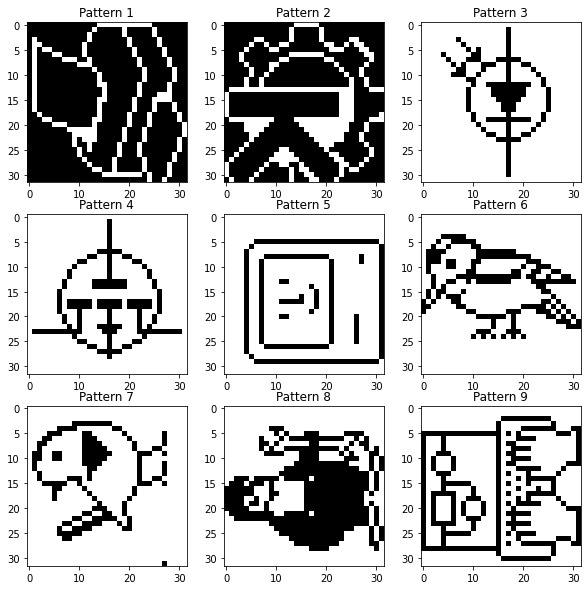

In [216]:
# load data with info in each column per image
pics = np.genfromtxt('pict.dat', delimiter=',').reshape(-1,1024)
fig = plt.figure(figsize=(10,10))
for i, pattern in enumerate(pics[:9,:]):
    fig.add_subplot(330 + i + 1)
    plt.imshow(pattern.reshape(32, 32), cmap='gray')
    plt.title("Pattern " + str(i+1))

In [217]:
def recall_image_test(distorted_pattern, expected_pattern, trained_network, asynchronous=False, max_iterations = 1, check_data=False, check_data_cycle=1):
    # fig = plt.figure(figsize=(10,10))

    # fig.add_subplot(331)
    # plt.imshow(distorted_pattern.reshape(32, 32), cmap='gray')
    # fig.add_subplot(332)

    output = trained_network.recall(distorted_pattern, asynchronous, max_iter=1, check_data=check_data, check_data_cycle=check_data_cycle)
    recall_iterations = 1

    compare_array = np.array([2]) == np.array([1])
    while not compare_array.all():
        print(recall_iterations)
        compare_array = expected_pattern == output
        if compare_array.all():
            print("SUCCESS after", recall_iterations, "iterations.")
            print()
            return output
        elif recall_iterations == max_iterations:
            print("FAILURE after", recall_iterations, "iterations." )
            # print("\t Final output was", output)
            print()
            return output
        else:
            recall_iterations += 1
            output = output = trained_network.recall(distorted_pattern, asynchronous, max_iter=1, check_data=check_data, check_data_cycle=check_data_cycle)



### 3.1.1 Check if first 3 are stable
Train network then run recall network afterwards. 

In [218]:
p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11 = pics[0], pics[1], pics[2], pics[3], pics[4], pics[5], pics[6], pics[7], pics[8], pics[9], pics[10]

hopfield_network_pics = HopfieldNetwork()
hopfield_network_pics.train(pics[0:3], True, asynchronous=True, max_iter=1)

All 3 patterns learnt.


In [219]:
pic1_stability_check = recall_image_test(p1, p1, hopfield_network_pics, asynchronous=True, max_iterations = 1)
pic2_stability_check = recall_image_test(p2, p2, hopfield_network_pics, asynchronous=True, max_iterations = 1)
pic3_stability_check = recall_image_test(p3, p3, hopfield_network_pics, asynchronous=True, max_iterations = 1)

1
SUCCESS after 1 iterations.

1
SUCCESS after 1 iterations.

1
SUCCESS after 1 iterations.



Check p1,p2,p3 on the network.

Text(0.5, 1.0, 'Pattern 3')

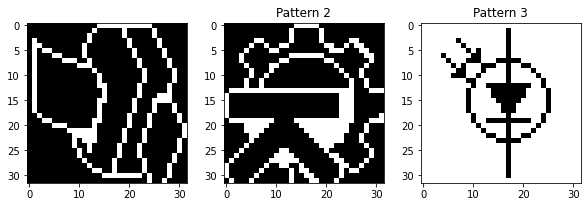

In [220]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(331)
plt.imshow(pic1_stability_check.reshape(32, 32), cmap='gray')
fig.add_subplot(332)
plt.imshow(pic2_stability_check.reshape(32, 32), cmap='gray')
plt.title("Pattern 2")
fig.add_subplot(333)
plt.imshow(pic3_stability_check.reshape(32, 32), cmap='gray')
plt.title("Pattern 3")

### 3.2.2 Check Degraded patterns
check synchronous and asynchronous networks

In [221]:
pic1_degraded = recall_image_test(p10, p1, hopfield_network_pics, asynchronous=False, max_iterations = 1)
pic2_degraded = recall_image_test(p11, p2, hopfield_network_pics, asynchronous=False, max_iterations = 1)
pic3_degraded = recall_image_test(p11, p3, hopfield_network_pics, asynchronous=False, max_iterations = 1)


1
SUCCESS after 1 iterations.

1
FAILURE after 1 iterations.

1
FAILURE after 1 iterations.



Text(0.5, 1.0, 'After Network')

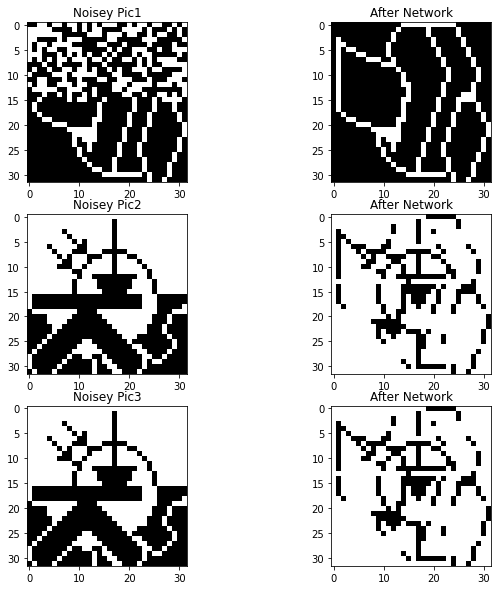

In [222]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(321)
plt.imshow(p10.reshape(32, 32), cmap='gray')
plt.title("Noisey Pic1")
fig.add_subplot(322)
plt.imshow(pic1_degraded.reshape(32, 32), cmap='gray')
plt.title("After Network")

fig.add_subplot(323)
plt.imshow(p11.reshape(32, 32), cmap='gray')
plt.title("Noisey Pic2")
fig.add_subplot(324)
plt.imshow(pic2_degraded.reshape(32, 32), cmap='gray')
plt.title("After Network")

fig.add_subplot(325)
plt.imshow(p11.reshape(32, 32), cmap='gray')
plt.title("Noisey Pic3")
fig.add_subplot(326)
plt.imshow(pic3_degraded.reshape(32, 32), cmap='gray')
plt.title("After Network")

1
SUCCESS after 1 iterations.

1
FAILURE after 1 iterations.

1
FAILURE after 1 iterations.



Text(0.5, 1.0, 'After Network')

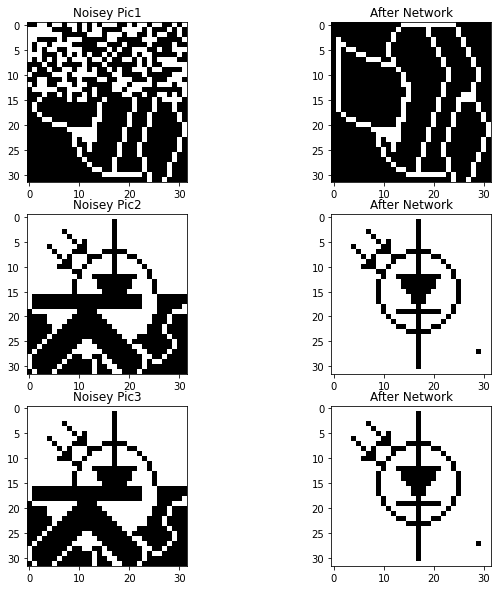

In [223]:
pic1_degraded = recall_image_test(p10, p1, hopfield_network_pics, asynchronous=True, max_iterations = 1)
pic2_degraded = recall_image_test(p11, p2, hopfield_network_pics, asynchronous=True, max_iterations = 1)
pic3_degraded = recall_image_test(p11, p3, hopfield_network_pics, asynchronous=True, max_iterations = 1)

fig = plt.figure(figsize=(10,10))

fig.add_subplot(321)
plt.imshow(p10.reshape(32, 32), cmap='gray')
plt.title("Noisey Pic1")
fig.add_subplot(322)
plt.imshow(pic1_degraded.reshape(32, 32), cmap='gray')
plt.title("After Network")

fig.add_subplot(323)
plt.imshow(p11.reshape(32, 32), cmap='gray')
plt.title("Noisey Pic2")
fig.add_subplot(324)
plt.imshow(pic2_degraded.reshape(32, 32), cmap='gray')
plt.title("After Network")

fig.add_subplot(325)
plt.imshow(p11.reshape(32, 32), cmap='gray')
plt.title("Noisey Pic3")
fig.add_subplot(326)
plt.imshow(pic3_degraded.reshape(32, 32), cmap='gray')
plt.title("After Network")

### 3.2.3 Random Selection

In [224]:
pic1_degraded_100 = hopfield_network_pics.recall(p10, asynchronous=True, max_iter=1, check_data=True, check_data_cycle=100)
pic1_degraded_400 = hopfield_network_pics.recall(p10, asynchronous=True, max_iter=1, check_data=True, check_data_cycle=400)
pic1_degraded_700 = hopfield_network_pics.recall(p10, asynchronous=True, max_iter=1, check_data=True, check_data_cycle=700)
pic1_degraded_1000 = hopfield_network_pics.recall(p10, asynchronous=True, max_iter=1, check_data=True, check_data_cycle=1000)
pic1_degraded_1024 = hopfield_network_pics.recall(p10, asynchronous=True, max_iter=1, check_data=True, check_data_cycle=1024)


Text(0.5, 1.0, 'After 1024')

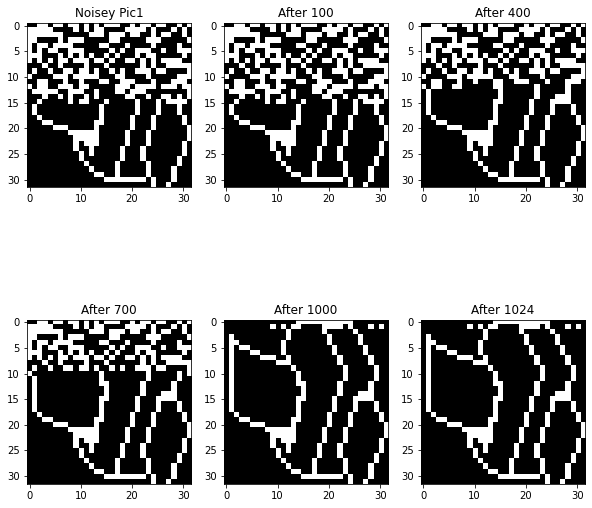

In [225]:
# np.shape(pic1_degraded_every_100)

fig = plt.figure(figsize=(10,10))

fig.add_subplot(231)
plt.imshow(p10.reshape(32, 32), cmap='gray')
plt.title("Noisey Pic1")
fig.add_subplot(232)
plt.imshow(pic1_degraded_100.reshape(32, 32), cmap='gray')
plt.title("After 100")
fig.add_subplot(233)
plt.imshow(pic1_degraded_400.reshape(32, 32), cmap='gray')
plt.title("After 400")
fig.add_subplot(234)
plt.imshow(pic1_degraded_700.reshape(32, 32), cmap='gray')
plt.title("After 700")
fig.add_subplot(235)
plt.imshow(pic1_degraded_1000.reshape(32, 32), cmap='gray')
plt.title("After 1000")
fig.add_subplot(236)
plt.imshow(pic1_degraded_1000.reshape(32, 32), cmap='gray')
plt.title("After 1024")

## 3.3 Energy
### 3.3.1 Energy of the different attractors

In [226]:
for attractor in attractors_for_3_1:
    state = []
    for a in attractor.split(" "):
        # print(a)
        if a == "1." or a == "-1.":
            state.append(float(a))
        elif a == "1.]" or a == "-1.]":
            state.append(float(a[0:2]))
        elif a == "[1." or a == "[-1.":
            state.append(float(a[1:3]))

    energy = hopfield_network_test.attractor_energy(np.array(state))
    print(attractor, "has energy",energy)

[-1. -1. -1. -1. -1. -1. -1. -1.] has energy -5.0
[-1. -1.  1. -1. -1. -1. -1.  1.] has energy -7.0
[-1. -1.  1. -1.  1. -1. -1.  1.] has energy -8.5
[-1.  1.  1. -1. -1. -1. -1.  1.] has energy -6.5
[-1. -1.  1. -1. -1.  1. -1.  1.] has energy -8.5
[-1.  1. -1. -1. -1.  1. -1. -1.] has energy -7.0
[ 1. -1. -1.  1.  1. -1.  1. -1.] has energy -9.0
[-1.  1.  1. -1.  1. -1. -1.  1.] has energy -7.0
[ 1.  1. -1.  1.  1. -1.  1. -1.] has energy -8.5
[-1. -1. -1. -1. -1.  1. -1. -1.] has energy -8.5
[ 1. -1.  1.  1.  1. -1.  1.  1.] has energy -7.0
[ 1.  1. -1.  1. -1.  1.  1. -1.] has energy -8.5
[-1. -1. -1. -1.  1. -1. -1. -1.] has energy -4.5
[ 1. -1. -1.  1. -1. -1.  1. -1.] has energy -6.5
[ 1.  1.  1.  1. -1.  1.  1.  1.] has energy -4.5
[ 1. -1. -1.  1. -1.  1.  1. -1.] has energy -7.0
[ 1.  1. -1.  1. -1. -1.  1. -1.] has energy -7.0
[ 1.  1.  1.  1.  1. -1.  1.  1.] has energy -8.5
[-1.  1.  1. -1. -1.  1. -1.  1.] has energy -9.0


Text(0.5, 1.0, 'Pic3 with Energy: -1462.25')

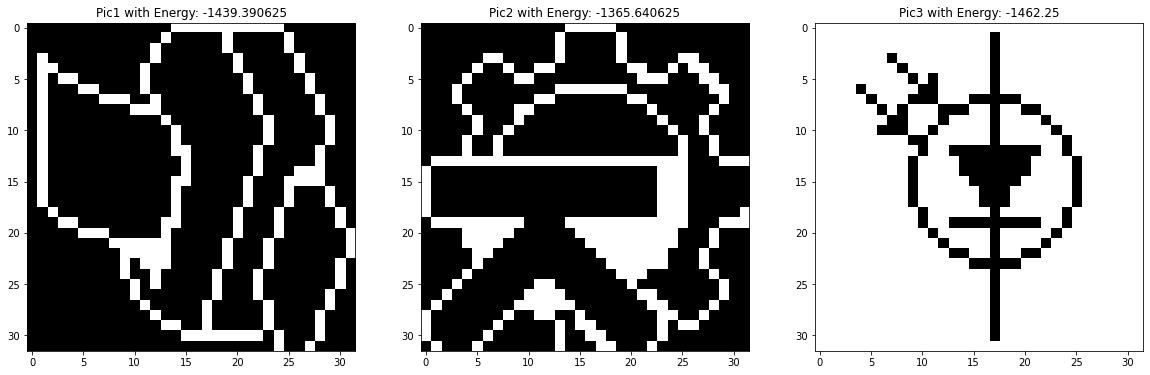

In [227]:
p1_energy = hopfield_network_pics.attractor_energy(p1)
p2_energy = hopfield_network_pics.attractor_energy(p2)
p3_energy = hopfield_network_pics.attractor_energy(p3)

fig = plt.figure(figsize=(20,20))

fig.add_subplot(131)
plt.imshow(p1.reshape(32, 32), cmap='gray')
plt.title("Pic1 with Energy: "+str(p1_energy))
fig.add_subplot(132)
plt.imshow(p2.reshape(32, 32), cmap='gray')
plt.title("Pic2 with Energy: "+str(p2_energy))
fig.add_subplot(133)
plt.imshow(p3.reshape(32, 32), cmap='gray')
plt.title("Pic3 with Energy: "+str(p3_energy))

### 3.3.2 Energy of the distorted points

In [228]:
energy = hopfield_network_test.attractor_energy(np.array(x1d))
print(attractor, "has energy",energy)
energy = hopfield_network_test.attractor_energy(np.array(x2d))
print(attractor, "has energy",energy)
energy = hopfield_network_test.attractor_energy(np.array(x3d))
print(attractor, "has energy",energy)

[-1.  1.  1. -1. -1.  1. -1.  1.] has energy -3.0
[-1.  1.  1. -1. -1.  1. -1.  1.] has energy -4.5
[-1.  1.  1. -1. -1.  1. -1.  1.] has energy -3.0


Text(0.5, 1.0, 'Pic11 with Energy: -173.5')

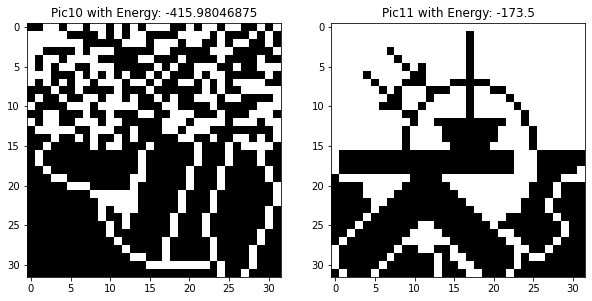

In [229]:
p10_energy = hopfield_network_pics.attractor_energy(p10)
p11_energy = hopfield_network_pics.attractor_energy(p11)

fig = plt.figure(figsize=(10,10))

fig.add_subplot(121)
plt.imshow(p10.reshape(32, 32), cmap='gray')
plt.title("Pic10 with Energy: "+str(p10_energy))
fig.add_subplot(122)
plt.imshow(p11.reshape(32, 32), cmap='gray')
plt.title("Pic11 with Energy: "+str(p11_energy))

### 3.3.3 Follow the energy for the sequntial update rule

Text(0.5, 1.0, 'Energy @ 1024: -1439.39')

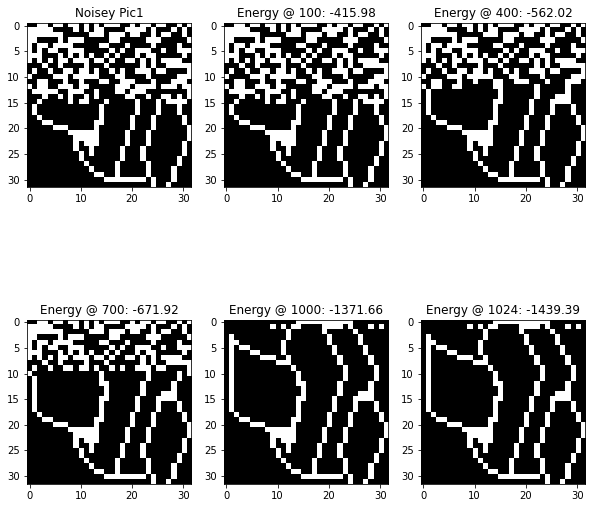

In [230]:
degraded_energy_100 = hopfield_network_pics.attractor_energy(pic1_degraded_100)
degraded_energy_400 = hopfield_network_pics.attractor_energy(pic1_degraded_400)
degraded_energy_700 = hopfield_network_pics.attractor_energy(pic1_degraded_700)
degraded_energy_1000 = hopfield_network_pics.attractor_energy(pic1_degraded_1000)
degraded_energy_1024 = hopfield_network_pics.attractor_energy(pic1_degraded_1024)


fig = plt.figure(figsize=(10,10))

fig.add_subplot(231)
plt.imshow(p10.reshape(32, 32), cmap='gray')
plt.title("Noisey Pic1")
fig.add_subplot(232)
plt.imshow(pic1_degraded_100.reshape(32, 32), cmap='gray')
plt.title("Energy @ 100: "+str(round(degraded_energy_100,2)))
fig.add_subplot(233)
plt.imshow(pic1_degraded_400.reshape(32, 32), cmap='gray')
plt.title("Energy @ 400: "+str(round(degraded_energy_400,2)))
fig.add_subplot(234)
plt.imshow(pic1_degraded_700.reshape(32, 32), cmap='gray')
plt.title("Energy @ 700: "+str(round(degraded_energy_700,2)))
fig.add_subplot(235)
plt.imshow(pic1_degraded_1000.reshape(32, 32), cmap='gray')
plt.title("Energy @ 1000: "+str(round(degraded_energy_1000,2)))
fig.add_subplot(236)
plt.imshow(pic1_degraded_1000.reshape(32, 32), cmap='gray')
plt.title("Energy @ 1024: "+str(round(degraded_energy_1024,2)))

In [231]:
energies_p10 = []
for i in range(1,100):
    pic1_degraded = hopfield_network_pics.recall(p10, asynchronous=True, max_iter=1, check_data=True, check_data_cycle=10*i)

    energy = hopfield_network_pics.attractor_energy(pic1_degraded)
    energies_p10.append(energy)

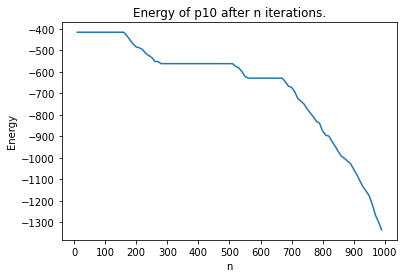

In [232]:
plt.figure()
plt.plot(np.arange(1,100,1)*10,energies_p10)
plt.xticks(np.arange(0, 1100, 100))
plt.yticks(np.arange(-1300, -300, 100))
plt.ylabel("Energy")
plt.xlabel("n")
plt.title("Energy of p10 after n iterations.")
plt.show()

### 3.3.3 Arbitary State

Start with a random weight matrix (not symmetric).

In [198]:
np.random.seed(20)
weights = np.random.rand(1024,1024)
hopfield_network_pics.weights = weights

energies_p10 = []
for i in range(1,100):
    pic1_degraded = hopfield_network_pics.recall(p1, asynchronous=True, max_iter=1, check_data=True, check_data_cycle=10*i)

    energy = hopfield_network_pics.attractor_energy(pic1_degraded)
    energies_p10.append(energy)

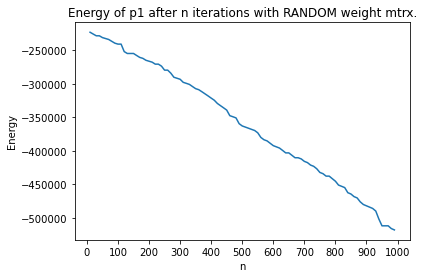

In [199]:
plt.figure()
plt.plot(np.arange(1,100,1)*10,energies_p10)
plt.xticks(np.arange(0, 1100, 100))
# plt.yticks(np.arange(-1300, -300, 100))
plt.ylabel("Energy")
plt.xlabel("n")
plt.title("Energy of p1 after n iterations with RANDOM weight mtrx.")
plt.show()

Start with a symmetric random weight matrix.

In [233]:
hopfield_network_pics.weights = weights
hopfield_network_pics.weights = 0.5*(weights+weights.T)

energies_p10 = []
for i in range(1,100):
    pic1_degraded = hopfield_network_pics.recall(p1, asynchronous=True, max_iter=1, check_data=True, check_data_cycle=10*i)

    energy = hopfield_network_pics.attractor_energy(pic1_degraded)
    energies_p10.append(energy)

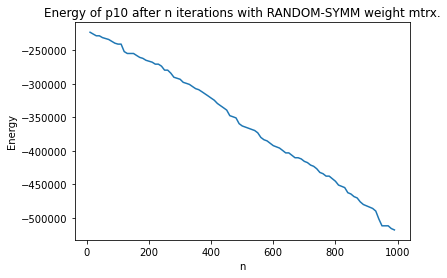

In [235]:
plt.figure()
plt.plot(np.arange(1,100,1)*10,energies_p10)
# plt.xticks(np.arange(0, 1100, 100))
# plt.yticks(np.arange(-1300, -300, 100))
plt.ylabel("Energy")
plt.xlabel("n")
plt.title("Energy of p10 after n iterations with RANDOM-SYMM weight mtrx.")
plt.show()

## 3.4 Distortion Resistance

In [202]:
pics = np.genfromtxt('pict.dat', delimiter=',').reshape(-1,1024)

p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11 = pics[0], pics[1], pics[2], pics[3], pics[4], pics[5], pics[6], pics[7], pics[8], pics[9], pics[10]

p1_noise = p1
p2_noise = p2
p3_noise = p3

distortion_resistance_network = HopfieldNetwork()
distortion_resistance_network.train(pics[0:3], True, asynchronous=False, max_iter=1)

All 3 patterns learnt.


In [203]:
pic1_stability_check = recall_image_test(p1, p1, distortion_resistance_network, asynchronous=True, max_iterations = 1)
pic2_stability_check = recall_image_test(p2, p2, distortion_resistance_network, asynchronous=True, max_iterations = 1)
pic3_stability_check = recall_image_test(p3, p3, distortion_resistance_network, asynchronous=True, max_iterations = 1)

# fig = plt.figure(figsize=(10,10))
# fig.add_subplot(331)
# plt.imshow(pic1_stability_check.reshape(32, 32), cmap='gray')
# fig.add_subplot(332)
# plt.imshow(pic2_stability_check.reshape(32, 32), cmap='gray')
# plt.title("Pattern 2")
# fig.add_subplot(333)
# plt.imshow(pic3_stability_check.reshape(32, 32), cmap='gray')
# plt.title("Pattern 3")

1
SUCCESS after 1 iterations.

1
SUCCESS after 1 iterations.

1
SUCCESS after 1 iterations.



In [204]:
def distortion_resistance_recall(distorted_pattern, trained_network, max_iterations=10):
    i = 0
    while i < max_iterations:
        output = trained_network.recall(distorted_pattern)
        distorted_pattern = output
        i += 1
    
    return output

In [205]:
def energies_of_distortion_resistances(pattern, trained_network, max_iterations=10):
    energies = []
    original_pattern = pattern.copy()
    np.random.seed(0)
    idx =  np.arange(0,1024,1)
    np.random.shuffle(idx)
    # swap one digit per iteration
    # calc energy per swap
    for i in idx:
        pattern[i] = pattern[i]*(-1)
        distortion_output = distortion_resistance_recall(pattern, trained_network,max_iterations=1)

        energy = trained_network.attractor_energy(distortion_output)
        energies.append(energy)
    
    return energies, pattern


In [206]:
energies, p = energies_of_distortion_resistances(p1, distortion_resistance_network, max_iterations=10)

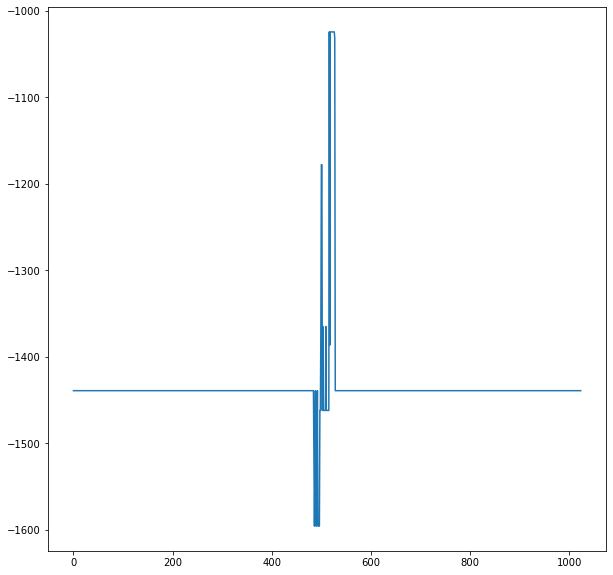

In [207]:
fig = plt.figure(figsize=(10,10))

# fig.add_subplot(131)
plt.plot(np.arange(0,1024,1), energies)
plt.show()

# fig.add_subplot(332)
# plt.imshow(p.reshape(32, 32), cmap='gray')
# plt.title("Pattern 2")

# fig.add_subplot(333)
# plt.imshow(pic3_stability_check.reshape(32, 32), cmap='gray')
# plt.title("Pattern 3")